In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

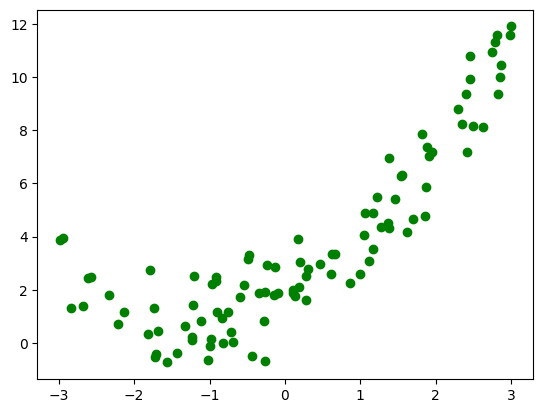

In [26]:
x = 6*np.random.rand(100,1)-3
'''
    - np.random.rand(100,1) : generates 100 random values between 0 and 1.
    - Multiplying by 6 scales the range from [0,1] to [0,6].
    - Subtracting 3 shifts the range to [-3,3].
'''
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)
# np.random.randn() : adds Standard Normally Distributed noise

## Quadratic equation used : y=0.5x^2 + 1.5x + 2 + outliers

plt.scatter(x,y,color='g')

In [27]:
X_train

array([[ 1.14140762],
       [-2.53981679],
       [-0.17861946],
       [ 1.89533398],
       [-0.6262768 ],
       [-1.1949379 ],
       [-2.57341273],
       [-2.45127535],
       [-2.79159776],
       [-1.83322179],
       [-1.78418674],
       [ 1.73503847],
       [ 0.04389955],
       [ 0.72561333],
       [ 2.11045222],
       [-1.55834562],
       [-2.6840041 ],
       [-0.88759904],
       [-0.39485199],
       [ 2.48922322],
       [-2.33650856],
       [ 0.38148016],
       [-0.12727492],
       [-0.92590211],
       [ 2.7406487 ],
       [ 0.36242699],
       [ 0.78258199],
       [ 0.87899971],
       [ 1.49265349],
       [-0.7526028 ],
       [-0.41992623],
       [-1.4720497 ],
       [-1.21955183],
       [ 1.19997438],
       [ 0.55905222],
       [-2.13887321],
       [-0.09951262],
       [ 1.30628207],
       [-0.16037779],
       [ 1.09948256],
       [-0.29456921],
       [-1.97746452],
       [-0.88094503],
       [ 2.58757326],
       [-1.48817077],
       [-0

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [36]:
## Lets implemnt linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

In [38]:
### Performence of model
from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(X_test))
print(score)

0.7773384330001428


Text(0, 0.5, 'Y-Dataset')

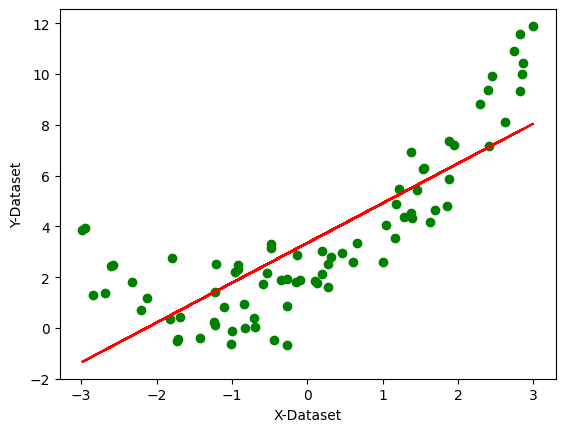

In [39]:
## Lets visualize this model
plt.plot(X_train,regression.predict(X_train),color = 'r')
plt.scatter(X_train,y_train, color='g')
plt.xlabel('X-Dataset')
plt.ylabel('Y-Dataset')

In [40]:
## let's apply Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

### PolynomialFeatures()
It is a method that **expands** features into polynomial terms, allowing models to capture **nonlinear relationships.**

**E.g.** if I have just $X1$ variable. If I say I want to use a degree of two, that basically means *$X1^2$*
  will also be created as a new feature.

In [41]:

poly = PolynomialFeatures(degree=2,include_bias=True) # include_bias=True : constant term added
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [42]:
X_train_poly

array([[ 1.00000000e+00,  1.37324432e+00,  1.88579997e+00],
       [ 1.00000000e+00, -1.79188478e+00,  3.21085107e+00],
       [ 1.00000000e+00,  4.59407445e-01,  2.11055201e-01],
       [ 1.00000000e+00, -1.22803214e+00,  1.50806294e+00],
       [ 1.00000000e+00,  2.79867947e-01,  7.83260679e-02],
       [ 1.00000000e+00, -2.20992969e+00,  4.88378922e+00],
       [ 1.00000000e+00,  1.88876189e-01,  3.56742149e-02],
       [ 1.00000000e+00, -1.43005008e-01,  2.04504322e-02],
       [ 1.00000000e+00,  6.12442997e-01,  3.75086425e-01],
       [ 1.00000000e+00,  2.73369439e-01,  7.47308504e-02],
       [ 1.00000000e+00,  1.21670115e+00,  1.48036168e+00],
       [ 1.00000000e+00, -2.12985332e+00,  4.53627515e+00],
       [ 1.00000000e+00,  1.94880108e+00,  3.79782564e+00],
       [ 1.00000000e+00, -1.70871855e+00,  2.91971908e+00],
       [ 1.00000000e+00,  2.82830657e+00,  7.99931806e+00],
       [ 1.00000000e+00,  9.99797872e-01,  9.99595785e-01],
       [ 1.00000000e+00,  1.93930230e-01

In [43]:
from sklearn.metrics import r2_score
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly,y_train)
y_pred = regression_poly.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9285861515913129


In [44]:
print(regression_poly.coef_)

[[0.         1.43739307 0.57597011]]


In [45]:
print(regression_poly.intercept_)

[1.81083207]


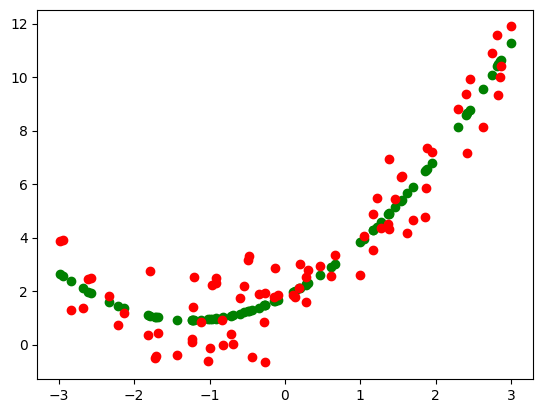

In [47]:
plt.scatter(X_train,regression_poly.predict(X_train_poly),color='g')
plt.scatter(X_train,y_train,color='r')

In [52]:
### If i make degree 3
poly3 = PolynomialFeatures(degree=3,include_bias=True) # include_bias=True : constant term added
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

In [53]:
X_train_poly3

array([[ 1.00000000e+00,  1.37324432e+00,  1.88579997e+00,
         2.58966410e+00],
       [ 1.00000000e+00, -1.79188478e+00,  3.21085107e+00,
        -5.75347517e+00],
       [ 1.00000000e+00,  4.59407445e-01,  2.11055201e-01,
         9.69603306e-02],
       [ 1.00000000e+00, -1.22803214e+00,  1.50806294e+00,
        -1.85194975e+00],
       [ 1.00000000e+00,  2.79867947e-01,  7.83260679e-02,
         2.19209558e-02],
       [ 1.00000000e+00, -2.20992969e+00,  4.88378922e+00,
        -1.07928308e+01],
       [ 1.00000000e+00,  1.88876189e-01,  3.56742149e-02,
         6.73800978e-03],
       [ 1.00000000e+00, -1.43005008e-01,  2.04504322e-02,
        -2.92451422e-03],
       [ 1.00000000e+00,  6.12442997e-01,  3.75086425e-01,
         2.29719054e-01],
       [ 1.00000000e+00,  2.73369439e-01,  7.47308504e-02,
         2.04291307e-02],
       [ 1.00000000e+00,  1.21670115e+00,  1.48036168e+00,
         1.80115775e+00],
       [ 1.00000000e+00, -2.12985332e+00,  4.53627515e+00,
      

In [55]:
from sklearn.metrics import r2_score
regression_poly3 = LinearRegression()
regression_poly3.fit(X_train_poly3,y_train)
y_pred3 = regression_poly3.predict(X_test_poly3)
score1 = r2_score(y_test,y_pred3)
print(score1)

0.9286773287026542


### Prediction of new data

In [ ]:

X_new = np.linspace(-3, 3, 200).reshape(200,1)
    # Generates 200 evenly spaced values between -3 and 3 
    # and Converts the 1D array into a 2D column vector

X_new_poly = poly.transform(X_new)


In [59]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

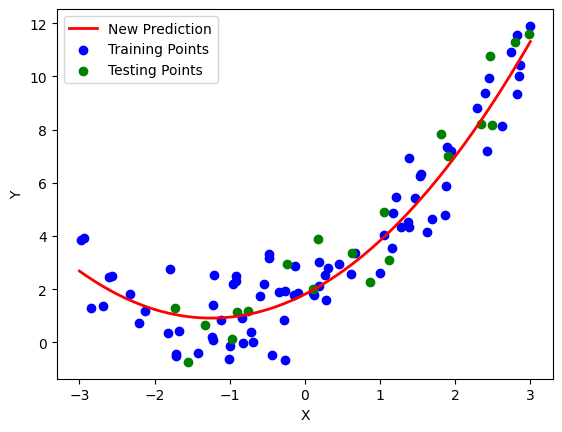

In [ ]:
y_new = regression_poly.predict(X_new_poly) # Predicting
plt.plot(X_new, y_new, color='r', linewidth=2,label="New Prediction")
plt.scatter(X_train,y_train, color='b', label="Training Points")
plt.scatter(X_test, y_test, color='g', label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend() # adds a legend to your plot, helping distinguish different plotted elements.
plt.show()

### Pipeline in Polynomial
Pipelining is the process of chaining multiple steps in a machine learning workflow into a single object. 

- ✅ Pipelining combines multiple preprocessing & modeling steps.
- ✅ Reduces code complexity and prevents data leakage.

Now in pipelining concept, all we have to do is that I will create a **generic function** in which whatever
**degree** you assign, you will be able to see that what kind of curve it will be fitting to for a new
data set.

In [80]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()

    poly_model =Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    ''' Creates a Pipeline:
            Step 1: poly_features → Expands X_train to include polynomial features.
            Step 2: lin_reg → Fits a linear regression model on the transformed features.
    '''

    poly_model.fit(X_train,y_train) ## Trains the polynomial regression model using X_train and y_train.
    y_pred_new=poly_model.predict(X_new) ## Predicts values for X_new

    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

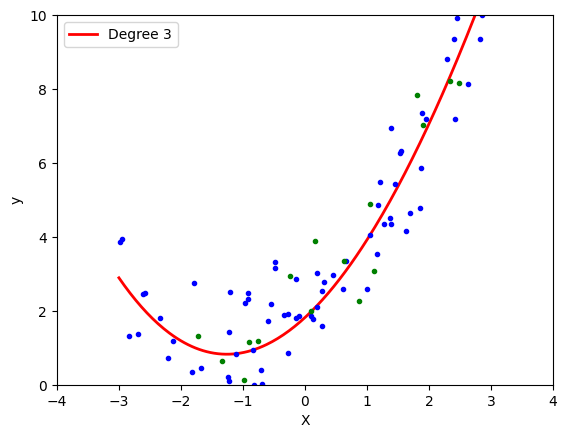

In [91]:
poly_regression(3)